# Pairwise Distance using Intel Extensions for Scikit-learn*

![Assets/PairwiseStocks.jpg](Assets/PairwiseStocks.jpg)

## Learning Objectives:

- Describe Apply the correct surgical patching method to patch pairwise_distance
- Describe the application of paairwise_distance to the problem of finding all stocks charts are simialr to a chosen stock pattern
- Application of pairwise_distances to similarity of Geometric Brownian Motion method of stock simulation

**References:**

P. Glasserman, Monte Carlo methods in financial engineering. Vol. 53 (2013), Springer Science & Business Media.

Inspired by article by: Riccardo D'Elia
Article: How to simulate financial portfolios with Python
url: https://medium.com/towards-data-science/how-to-simulate-financial-portfolios-with-python-d0dc4b52a278


## Background:

Geometrics Brownian Motion using arrays's of precomputed random numbers is used to synthesize a portfolio of 500 stocks. Here we created minute data for one years worth of trades. The data are random but partialy correlated with randomly generated eigenvectors to simulate stock behavoir.  

The goal for the exercise is to find one of several interesting trading patterns and plot the stocks that best match that pattern using pairwise_distance powered by oneAPI.

## Exercise:

- Patch the pairwise_distance cells either individually or by region (first cell in notebook)


In [3]:
def Generate_Portfolio_Vectorized(portfolio=500):
    # based on  Geometric Brownian Motion method of stock simulation
    # P. Glasserman, Monte Carlo methods in financial engineering. Vol. 53 (2013), Springer Science & Business Media.
    # Inspired by Article: How to simulate financial portfolios with Python  by: Riccardo D'Elia
    
    import numpy as np
    from scipy.stats import random_correlation
    import matplotlib.pyplot as plt
    from scipy import signal

    #portfolio = 500  # 500 stock like portfolio
    seed = 2022  # move seed here to generate same year over and over
    T = 1
    N = int(12*22*7*60) #number trading minutes in a month
    # 12 months in year
    # 22 trading days per month
    # 7 trading hours per day
    # 60 minutes per hour
    
    P0 = np.random.normal(600, 20, portfolio)  #initial price of each stock randomly created near $600 std of $20
    mu = np.random.uniform(0.02, 0.05, portfolio)  # mu is mean of stock behavior, experimentally determined to look right
    sigma = np.random.uniform(0.2, 0.45, portfolio)  # signma is std around mean, experimentally determined to look right

    # dominant trends created randomly and contructed to be mutually orthonormal 
    eig = np.random.uniform(0.1, 1, portfolio)       # generate eignvector randomly
    eig = eig/np.sum(eig)*portfolio                  # Sum of eigenvalues must equal dimensionality.
    corr = random_correlation.rvs(eig)               # Draw random correlation matrices
    
    # Generate Covariance matrix from sigmas
    Cov = np.tensordot(sigma, sigma, 0) * corr       # covariance matrix

    # Uncorrelated Geometric Bronian Motion
    #seed = 2022 move seed to here to generate random years 
    np.random.seed(seed)
    portfolio = np.size(P0)  #initally 500 stocks by default
    t = np.linspace(0., T, int(N))  # time - number of minutes in year
    L = np.linalg.cholesky(Cov)     # Cholesky Decomposition [L*L.T] of covariance matrix
    P = np.ones([portfolio, int(N)])     # Initialize Price matrix P to all ones
    P[:, 0] = P0                    # Intial Price
    drift = (mu - 0.5 * sigma**2) * (t[1] - t[0])  # drift term
    sqrt_delta = (np.sqrt(t[1] - t[0])) # assumes equally spaced trading times

    Z = np.random.normal(0., 1., (len(t), portfolio ))  # random vector of portfolio sized value 0 to 1 (time x 500)
    diff= np.matmul(Z, L) * sqrt_delta  # diffusion term
    DiffDrift = np.exp( diff + drift ) # e to the (diff + drit)
    P = P0 * np.cumprod(DiffDrift, axis = 0)  # cumprod multiplies returns from start of time
    return P

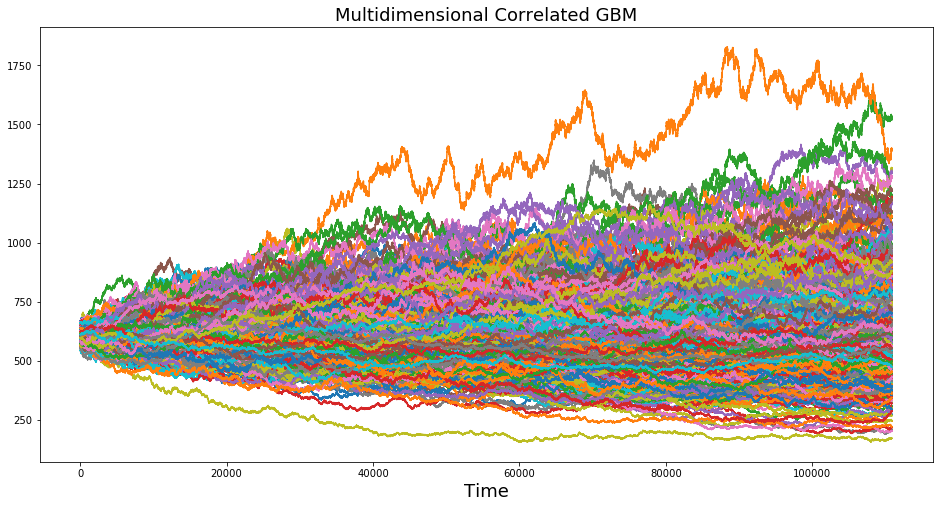

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

P = Generate_Portfolio_Vectorized(portfolio=500)

plt.figure(figsize = (16,8))
plt.title('Multidimensional Correlated GBM', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

plt.plot(P)
plt.show()

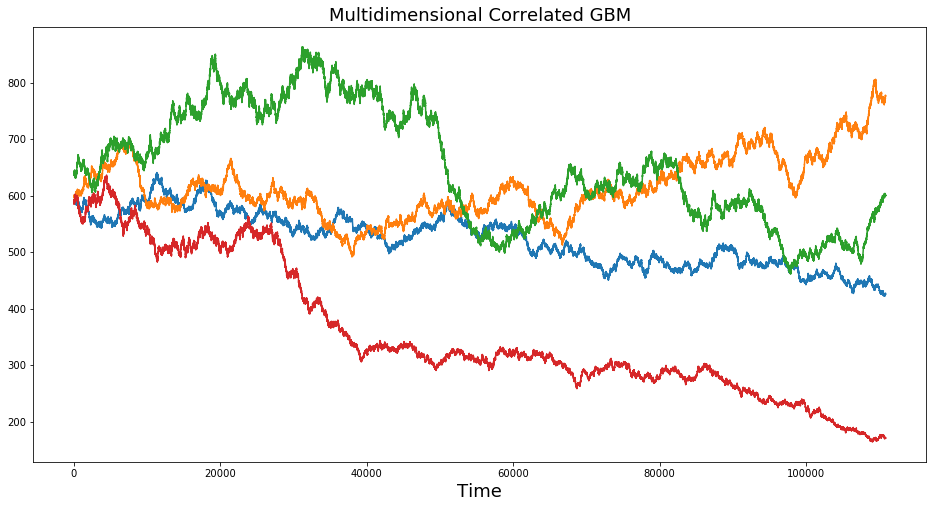

In [5]:
plt.figure(figsize = (16,8))
plt.title('Multidimensional Correlated GBM', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

portfolio = 500
P =  Generate_Portfolio_Vectorized(portfolio)

plt.plot(P[:,:4])

# Retreive previous compelling stock shapes

Retrieve shapes found during a previous run.

Now search for these shape patterns in the 500 generated stocks, to find similarly shaped times series

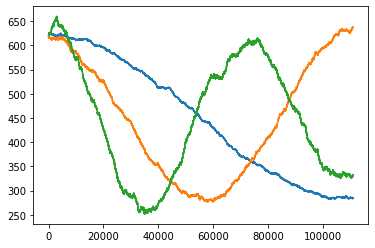

In [6]:
import numpy as np
seed = 2022
with open('data/shapes{}.npy'.format(seed), 'rb') as f:
    shapes = np.load(f)
for i in range(3):
    plt.plot(120*shapes.T[i]+450)

# Use Pairwise Distance find similar shaped stocks

Read shapes2022.pny (or shapesxxxx.pny)

This file contains 10 interesting shapes from a previous run

Find the four closest matching simulated stocks to the one of several interesting shapes

## Apply a surgical patch below

Use surgical patch where you specify the pairwise_distance function explicitly


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


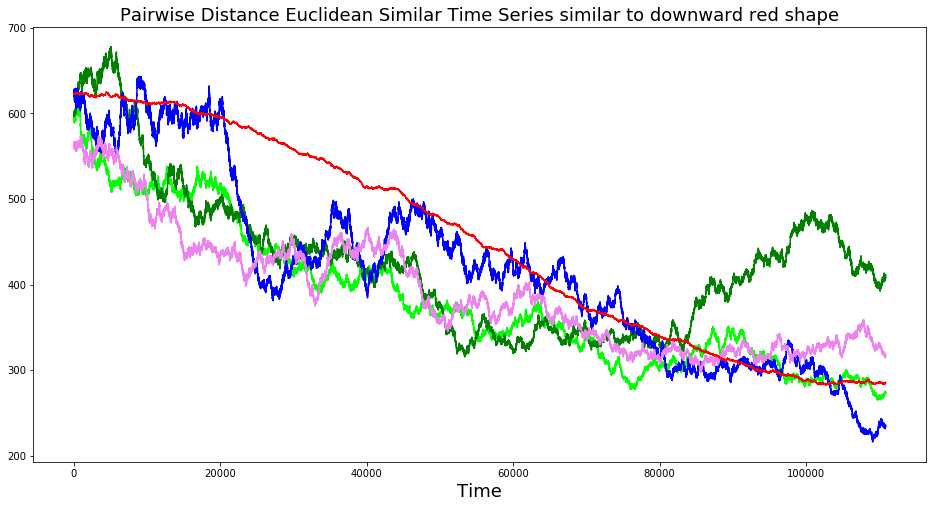

In [23]:
# dominant trend - find top 3 stocks which follow the red rend

#### Apply patch below - use sugical patching requiring the abreviated name for this routine 
### use surgical pathc where you specify the pairwise_distance function explicitly
######################################## Apply patch below 

from sklearnex import patch_sklearn
patch_sklearn('distances')

########################################

findN = 4

from sklearn.metrics.pairwise import pairwise_distances

# for stocks, I am treating the time as the components of the vector
# so I transpose the X & Y so that time[s] are the columns
sim = pairwise_distances(P.T, Y=shapes[:,0].reshape(-1,1).T, metric='euclidean') 
# use np.argpartition to find the 4 closest similar to sorting the array and choosing the first 4 or last 4
idxs = np.argpartition(sim.flatten(), findN)[findN:]

plt.figure(figsize = (16,8))
plt.title('Pairwise Distance Euclidean Similar Time Series similar to downward red shape', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

colors = ['lime','g','b','violet']
for i in range(len(colors)):
    plt.plot(P[:,idxs[i]], c=colors[i])
plt.plot(120*shapes[:,0] + 450, c = 'r')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


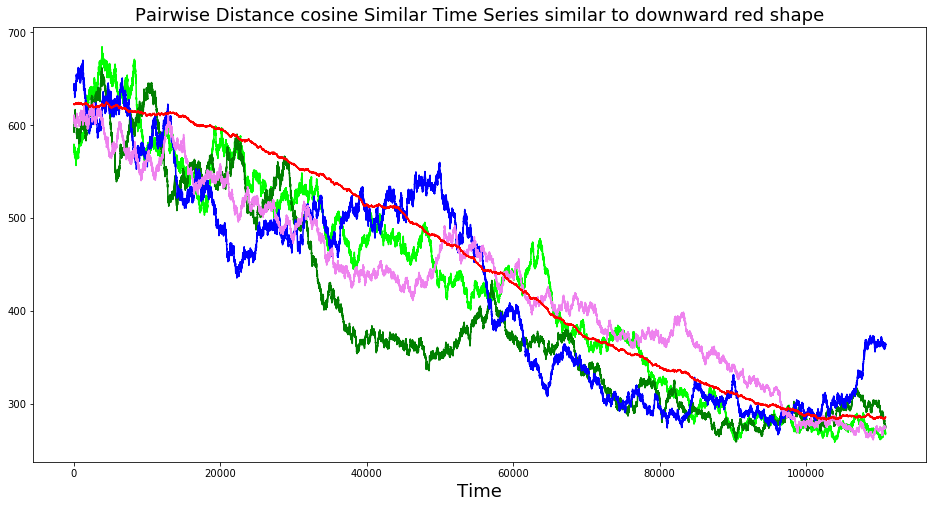

In [24]:
# dominant trend - find top 3 stocks which follow the red rend

#### Apply patch below - use sugical patching requiring the abreviated name for this routine 
### use surgical pathc where you specify the pairwise_distance function explicitly
######################################## Apply patch below 

from sklearnex import patch_sklearn
patch_sklearn('distances')

########################################

findN = 4

from sklearn.metrics.pairwise import pairwise_distances

# for stocks, I am treating the time as the components of the vector
# so I transpose the X & Y so that time[s] are the columns
sim = pairwise_distances(P.T, Y=shapes[:,0].reshape(-1,1).T, metric='cosine') 
# use np.argpartition to find the 4 closest similar to sorting the array and choosing the first 4 or last 4
idxs = np.argpartition(sim.flatten(), findN)[findN:]

plt.figure(figsize = (16,8))
plt.title('Pairwise Distance cosine Similar Time Series similar to downward red shape', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

colors = ['lime','g','b','violet']
for i in range(len(colors)):
    plt.plot(P[:,idxs[i]], c=colors[i])
plt.plot(120*shapes[:,0] + 450, c = 'r')


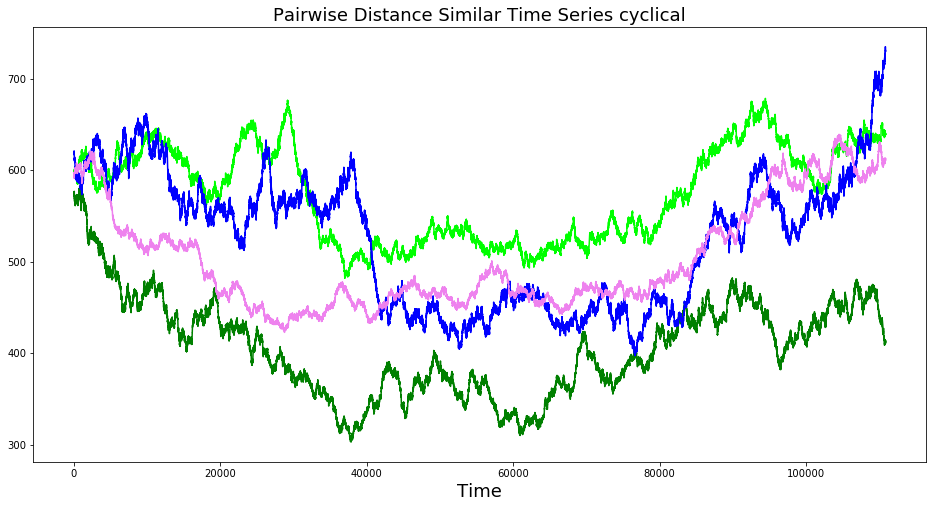

In [22]:
# inverse dominant trend - find top 3 stocks - trending down which follow the red trend
# Experimenting with using Correlation instead of cosine - Cosine mathces much better
sim = pairwise_distances(P.T, Y=shapes[:,1].reshape(-1,1).T, metric="correlation")
idxs = np.argpartition(sim.flatten(), findN)[findN:]

plt.figure(figsize = (16,8))
plt.title('Pairwise Distance Similar Time Series cyclical', fontsize = 18)
plt.xlabel('Time', fontsize = 18)

colors = ['lime','g','b','violet']
for i in range(len(colors)):
    plt.plot(P[:,idxs[i]], c=colors[i])


# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.